# 1. Client Segmentation — RFM Analysis

## 1.1 Project Description

This notebook performs a **customer segmentation analysis** for an e-commerce site, using the **RFM (Recency, Frequency, Monetary)** model.  
The objective is to identify customer groups with distinct purchasing behaviors, in order to propose targeted marketing actions (loyalty programs, re-engagement campaigns, personalized offers, etc.).

The main steps are:

1. Exploratory Data Analysis (EDA)  
2. Calculation of RFM variables  
3. Standardization of variables  
4. Clustering segmentation  
5. Model validation  
6. Cluster interpretation  
7. Strategic recommendations

---

## 1.2 Business Context

Customer segmentation is an essential lever in digital marketing. By categorizing customers according to their value and engagement, a company can:

- Better target its marketing campaigns  
- Retain strategic customers  
- Optimize acquisition and retention costs  
- Increase customer lifetime value (CLV)

---

## 1.3 Data Source
https://archive.ics.uci.edu/dataset/502/online+retail+ii


# 2. Data Import & Preparation


In [1]:
# Import necessary libraries for analysis

import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# For better readability of numbers
pd.options.display.float_format="{:20.2f}".format

# Display all columns
pd.set_option("display.max_columns",999)


# 3. Exploratory Data Analysis (EDA)


In [2]:
df = pd.read_excel("./Data/online_retail_II.xlsx", sheet_name=0)
df.head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


We notice that there are fewer "customer ID" than "Invoice" --> Plan an analysis of null values


In [4]:
df.describe()


,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


The minimum values observed for Quantity and Price are negative. A complementary analysis is necessary.


In [5]:
# To include object type data
df.describe(include="O")


,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
# Let's now see what empty "Customer ID" corresponds to
df[df["Customer ID"].isna()].head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


These rows will need to be removed, as we cannot classify customers without an ID.


In [7]:
# Let's verify what "negative" quantities correspond to
df[df["Quantity"]<0].head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


We see here "invoices" starting with the letter "C". According to the data source, this corresponds to cancellations.


In [8]:
# Display invoices that have more than 6 digits in "Invoice"
df["Invoice"] = df["Invoice"].astype("str") #convert to string
df[df["Invoice"].str.match("^//d{6}$") == False].head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [9]:
# Could there be other letters in the "invoices" ID?
df["Invoice"].str.replace("[0-9]","",regex=True).unique()


array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["Invoice"].str.startswith("A",na=False)]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
# Let's now verify the StockCode variable.
# According to the description provided by the data source, it must consist of 5 digits.
# StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}$")==False].head(10)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
29,489436,84596L,BISCUITS SMALL BOWL LIGHT BLUE,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
42,489437,84507B,STRIPES DESIGN MONKEY DOLL,6,2009-12-01 09:08:00,2.55,15362.00,United Kingdom
46,489437,84970S,HANGING HEART ZINC T-LIGHT HOLDER,12,2009-12-01 09:08:00,0.85,15362.00,United Kingdom
61,489438,84031A,CHARLIE+LOLA RED HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.00,United Kingdom
62,489438,84031B,CHARLIE LOLA BLUE HOT WATER BOTTLE,56,2009-12-01 09:24:00,3.00,18102.00,United Kingdom


In [12]:
# Some "StockCode" end with letters. Let's check if other types of "StockCode" exist
df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()


array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

According to the source documentation, these StockCodes are invalid; we will exclude them from the analysis.


## 3.1 Data Cleaning


In [13]:
cleaned_df=df.copy()
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")
# Keep only rows with valid "Invoices"
cleaned_df=cleaned_df[cleaned_df["Invoice"].str.match("^\\d{6}$")==True]


In [14]:
# Keep only rows with valid "StockCode" codes
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")
cleaned_df=cleaned_df[(cleaned_df["StockCode"].str.match("^\\d{5}$")==True) | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True)]


In [15]:
# Remove rows with empty "Customer ID"
cleaned_df=cleaned_df.dropna(subset=["Customer ID"])


In [16]:
cleaned_df.describe()


,Quantity,InvoiceDate,Price,Customer ID
count,406323.00,406323,406323.00,406323.00
mean,13.62,2010-07-01 10:14:46.649094656,2.99,15373.66
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [17]:
# Some rows have price = 0
# we will remove them from the dataset
cleaned_df=cleaned_df[cleaned_df["Price"]>0]
cleaned_df.describe()


,Quantity,InvoiceDate,Price,Customer ID
count,406295.00,406295,406295.00,406295.00
mean,13.62,2010-07-01 10:18:05.997415424,2.99,15373.75
min,1.00,2009-12-01 07:45:00,0.03,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [18]:
# Now let's calculate the proportion of data retained after cleaning
len(cleaned_df)/len(df)


0.7732162805612596

77% of the initial data was retained (i.e., 23% of the data was removed during cleaning)


# 4. Feature Engineering (building segmentation variables)

To analyze customer behavior, we will build three commonly used indicators in marketing segmentation models.  
These variables correspond to the **RFM** model: *Recency*, *Frequency*, and *Monetary*.

- **Recency**: represents the number of days elapsed since the customer's last purchase. A low recency indicates a still-active customer.  
- **Frequency**: corresponds to the total number of purchases made by the customer over a given period. It reflects their level of engagement and loyalty.  
- **Monetary (Amount spent)**: measures the total sum of expenses made by the customer, allowing identification of high-value profiles.

The joint analysis of these three dimensions allows for a better understanding of purchasing behaviors and the construction of relevant segmentation, useful for guiding marketing actions such as retention, re-engagement, or personalization of offers.


In [19]:
# Calculate the total amount spent per customer
cleaned_df["totalSales"]=cleaned_df["Quantity"] * cleaned_df["Price"]
# Measure the time elapsed since the last purchase
max_invoice_date = cleaned_df["InvoiceDate"].max()
max_invoice_date
cleaned_df["Recency"] = (max_invoice_date - cleaned_df["InvoiceDate"]).dt.days
cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,totalSales,Recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40,373
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,373
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,373
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80,373
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,373
...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50,0


In [20]:
# Group data by customer
grouped_df=cleaned_df.groupby(by="Customer ID", as_index=False).agg(
Monetary = ("totalSales","sum"),
Frequency = ("Invoice","nunique"),
Recency=("Recency","min")

)
grouped_df.head(10)


,Customer ID,Monetary,Frequency,Recency
0,12346.00,169.36,2,164
1,12347.00,1323.32,2,2
2,12348.00,221.16,1,73
3,12349.00,2221.14,2,42
4,12351.00,300.93,1,10
5,12352.00,343.80,2,10
6,12353.00,317.76,1,43
7,12355.00,488.21,1,202
8,12356.00,3126.25,3,15
9,12357.00,11229.99,1,23


## 4.1 Graphical Analysis


Text(0, 0.5, 'Count')

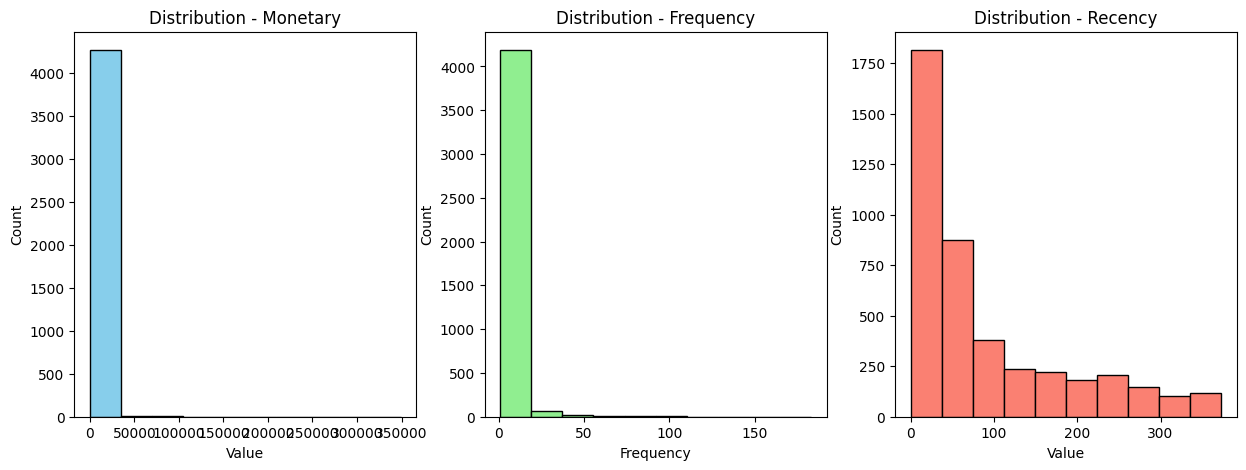

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(grouped_df["Monetary"], bins=10, color = "skyblue", edgecolor="black")
plt.title("Distribution - Monetary")
plt.xlabel("Value")
plt.ylabel("Count")

plt.subplot(1, 3, 2)
plt.hist(grouped_df["Frequency"], bins=10, color = "lightgreen", edgecolor="black")
plt.title("Distribution - Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")


plt.subplot(1, 3, 3)
plt.hist(grouped_df["Recency"], bins=10, color = "salmon", edgecolor="black")
plt.title("Distribution - Recency")
plt.xlabel("Value")
plt.ylabel("Count")


For better visualization of outliers (extreme values), we will use Boxplots.


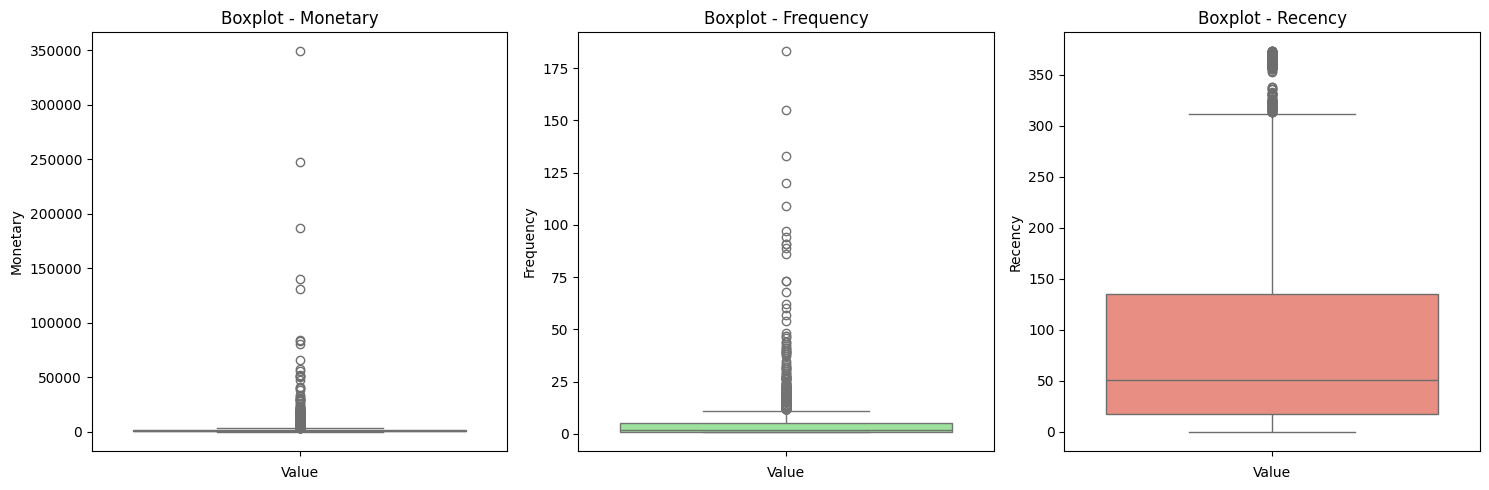

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=grouped_df["Monetary"], color='skyblue')
plt.title("Boxplot - Monetary")
plt.xlabel("Value")

plt.subplot(1, 3, 2)
sns.boxplot(data=grouped_df["Frequency"], color='lightgreen')
plt.title("Boxplot - Frequency")
plt.xlabel("Value")

plt.subplot(1, 3, 3)
sns.boxplot(data=grouped_df["Recency"], color='salmon')
plt.title("Boxplot - Recency")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


### 4.1.1 Distribution Analysis — Monetary, Frequency and Recency Variables

For the **Monetary** and **Frequency** variables, we observe that extreme values (*outliers*) are very high compared to the so-called nominal values.  
These observations are important, as these outliers generally correspond to high-value customers:  

- Those who generate high revenue,  
- Or those who purchase very frequently.  

It is therefore not relevant to exclude them from the analysis, as they represent a strategic part of the customer base and bring significant value to the company.  

In order to obtain a more relevant analysis, we will adopt a strategy in **two stages**:  

1. Perform an initial segmentation based on "nominal" customers.  
2. Perform a second segmentation specific to customers identified as *outliers*.  

This approach will allow us to better differentiate behaviors and obtain more precise **insights** for each customer group.


## 4.2 Separate outliers from "nominal" customers


### 4.2.1 Monetary Outliers


In [23]:
# Let's start by getting the 25th percentile of the "Monetary" variable
M_Q1 = grouped_df["Monetary"].quantile(0.25)
# Then, the 75th percentile
M_Q3 = grouped_df["Monetary"].quantile(0.75)
# Now let's calculate the interquartile range
M_IQR = M_Q3 - M_Q1

# Now let's create the outliers dataset
monetary_outliers_df = grouped_df[(grouped_df["Monetary"] > (M_Q3 + 1.5 * M_IQR)) | (grouped_df["Monetary"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()


,Customer ID,Monetary,Frequency,Recency
count,423.00,423.00,423.00,423.00
mean,15103.04,12188.10,17.17,30.04
std,1728.66,25830.85,19.73,51.54
min,12357.00,3802.04,1.00,0.00
25%,13622.00,4605.94,8.00,3.00
50%,14961.00,6191.32,12.00,13.00
75%,16692.00,10273.24,18.00,31.00
max,18260.00,349164.35,183.00,364.00


## 4.2.2 Frequency Outliers


In [24]:
F_Q1 = grouped_df["Frequency"].quantile(0.25)
F_Q3 = grouped_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

# Retrieve the outliers
frequency_outliers_df = grouped_df[(grouped_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (grouped_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()


,Customer ID,Monetary,Frequency,Recency
count,279.00,279.00,279.00,279.00
mean,15352.66,14409.71,23.81,16.09
std,1748.43,31381.74,21.93,26.59
min,12437.00,1094.39,12.00,0.00
25%,13800.00,4331.56,13.00,2.00
50%,15465.00,6615.77,17.00,7.00
75%,16828.50,11692.41,23.00,19.00
max,18260.00,349164.35,183.00,211.00


In [25]:
# Creating the "nominal" customers dataset
cas_nominaux_df = grouped_df[(~ grouped_df.index.isin(monetary_outliers_df.index) & (~ grouped_df.index.isin(frequency_outliers_df.index) ))]
cas_nominaux_df.describe()


,Customer ID,Monetary,Frequency,Recency
count,3809.00,3809.00,3809.00,3809.00
mean,15376.48,885.50,2.86,97.08
std,1693.20,817.67,2.24,98.11
min,12346.00,1.55,1.00,0.00
25%,13912.00,279.91,1.00,22.00
50%,15389.00,588.05,2.00,58.00
75%,16854.00,1269.05,4.00,154.00
max,18287.00,3788.21,11.00,373.00


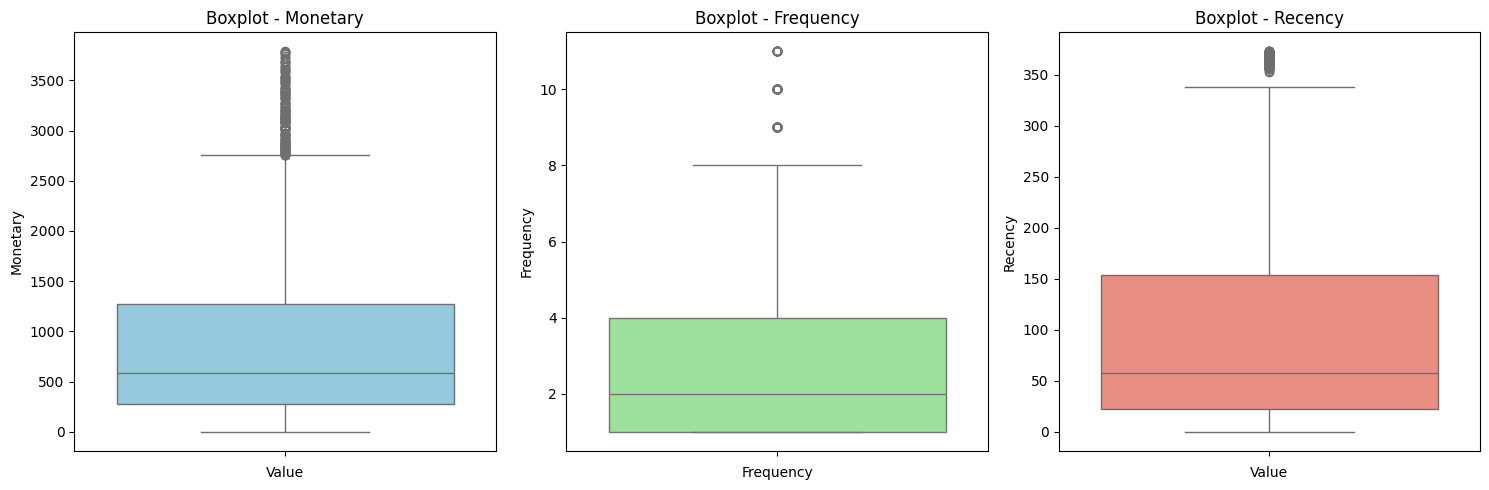

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=cas_nominaux_df["Monetary"], color='skyblue')
plt.title("Boxplot - Monetary")
plt.xlabel("Value")

plt.subplot(1, 3, 2)
sns.boxplot(data=cas_nominaux_df["Frequency"], color='lightgreen')
plt.title("Boxplot - Frequency")
plt.xlabel("Frequency")

plt.subplot(1, 3, 3)
sns.boxplot(data=cas_nominaux_df["Recency"], color='salmon')
plt.title("Boxplot - Recency")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


There are still some "outliers" but the data is much more homogeneous than before.


# 3D Visualization
A 3D visualization offers a better understanding of data distribution.


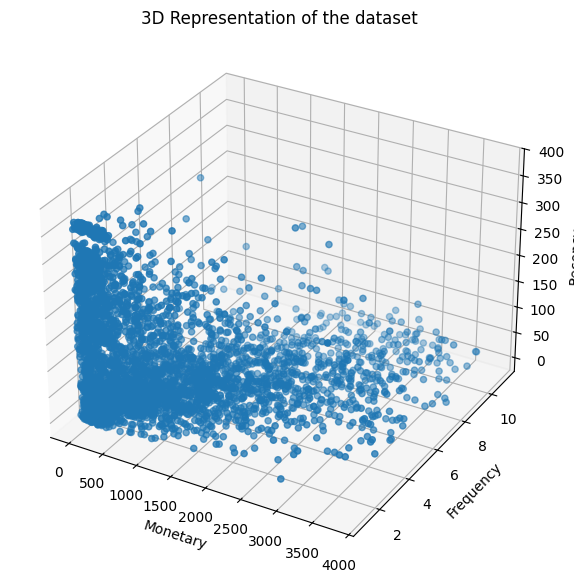

In [27]:
fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(cas_nominaux_df["Monetary"], cas_nominaux_df["Frequency"], cas_nominaux_df["Recency"])

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Representation of the dataset')

plt.show()


# 5. Data Normalization
Upon viewing the 3D graph, we can easily notice that the **Monetary**, **Frequency** and **Recency** variables present non-uniform distributions. This heterogeneity can influence both the visualization and the segmentation algorithm we wish to use (K-means clustering). It is therefore necessary to normalize the data before continuing the analysis.


In [28]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(cas_nominaux_df[["Monetary", "Frequency", "Recency"]])

scaled_data


array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.53551441, -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488782,  0.50659348, -0.81634357]])

In [29]:
# Convert our normalized data to dataframe
scaled_data_df = pd.DataFrame(scaled_data,index=cas_nominaux_df.index, columns=("Monetary","Frequency","Recency"))
scaled_data_df


,Monetary,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


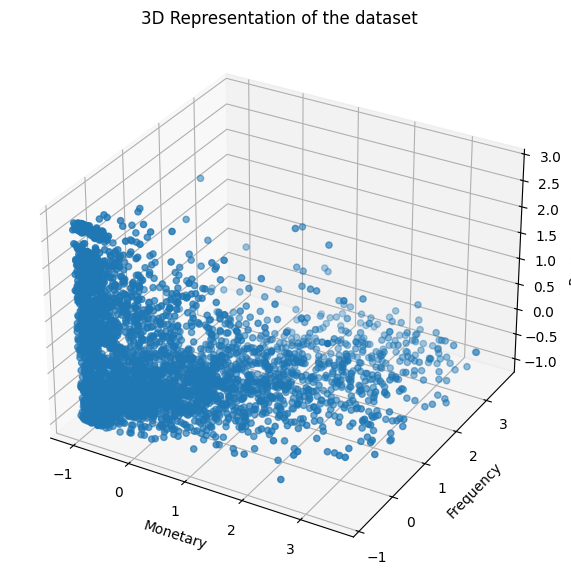

In [30]:
# Regenerate the 3D graph with normalized data

fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["Monetary"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Representation of the dataset')

plt.show()


In [31]:
scaled_data_df.describe()


,Monetary,Frequency,Recency
count,3809.00,3809.00,3809.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.08,-0.83,-0.99
25%,-0.74,-0.83,-0.77
50%,-0.36,-0.38,-0.40
75%,0.47,0.51,0.58
max,3.55,3.63,2.81


# 6. Clustering (K-Means)

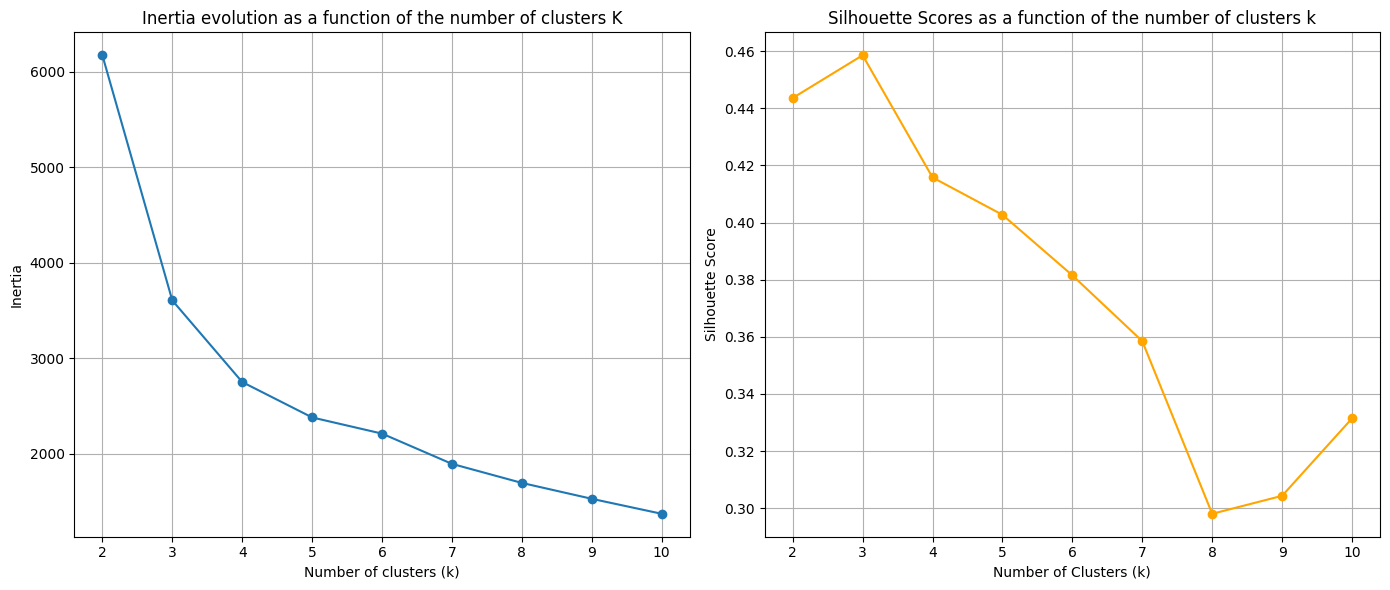

In [32]:
import warnings

# Ignore floating point computation warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

max_k = 10
inertie = []
silhoutte_scores = []

k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertie.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertie, marker='o')
plt.title('Inertia evolution as a function of the number of clusters K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores as a function of the number of clusters k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


## 6.1 Analysis

The evolution of inertia suggests that partitioning into 4 or 5 clusters would be appropriate.  
However, segmentation into 4 groups appears more relevant, as it presents a silhouette score higher than that obtained with 5 clusters.  

We will therefore retain a segmentation into 4 clusters.


## 6.2 Creating clusters


In [33]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels


array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [34]:
cas_nominaux_df["Cluster"] = cluster_labels

cas_nominaux_df


/var/folders/r5/w2l3nv355gq1bbfwnmb045680000gn/T/ipykernel_94358/1208941364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cas_nominaux_df["Cluster"] = cluster_labels


,Customer ID,Monetary,Frequency,Recency,Cluster
0,12346.00,169.36,2,164,1
1,12347.00,1323.32,2,2,0
2,12348.00,221.16,1,73,2
3,12349.00,2221.14,2,42,0
4,12351.00,300.93,1,10,2
...,...,...,...,...,...
4280,18283.00,641.77,6,17,0
4281,18284.00,411.68,1,66,2
4282,18285.00,377.00,1,295,1
4283,18286.00,1246.43,2,111,0


## 6.3 Cluster Visualization


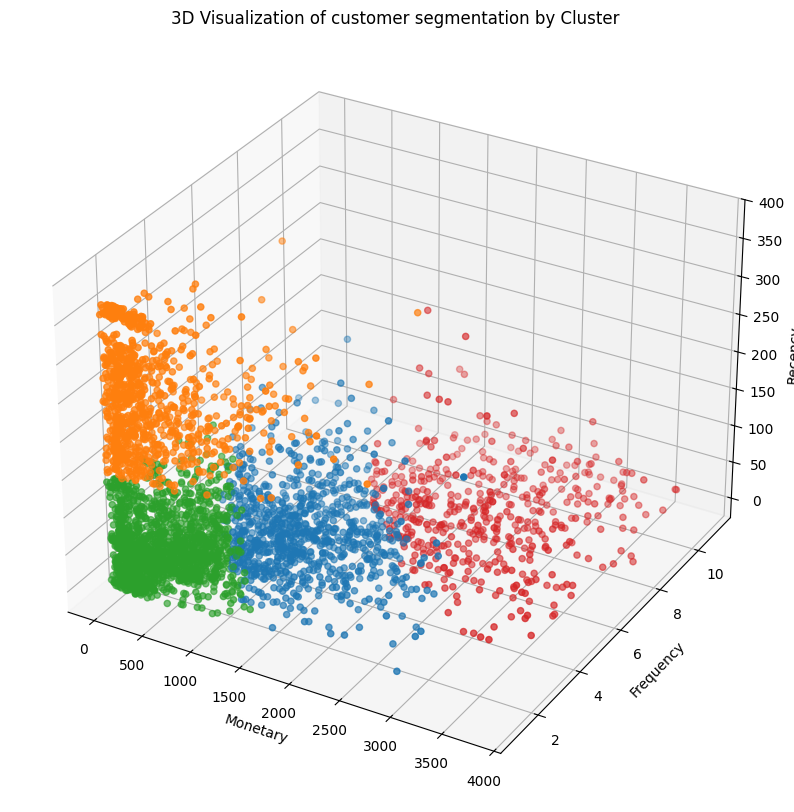

In [35]:
cluster_colors = {0: '#1f77b4',  
                  1: '#ff7f0e',  
                  2: '#2ca02c',  
                  3: '#d62728'}  

colors = cas_nominaux_df["Cluster"].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(cas_nominaux_df["Monetary"], 
                     cas_nominaux_df["Frequency"], 
                     cas_nominaux_df["Recency"], 
                     c=colors,  
                     marker='o')

ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Visualization of customer segmentation by Cluster')

plt.show()


## 6.4 First Interpretation

We can clearly distinguish the 4 clusters in this visualization:

1. **Red Cluster**  
   - High purchase frequency  
   - High expenses (Monetary)  
   - Recent purchases  

2. **Blue Cluster**  
   - Average purchase frequency  
   - Average expenses  
   - Recent purchases  

3. **Green Cluster**  
   - Low purchase frequency  
   - Low expenses  
   - Recent purchases  

4. **Orange Cluster**  
   - Low to average purchase frequency  
   - Low expenses  
   - High recency → the last purchases date back several months


To deepen the analysis, we will use violin plots in order to compare the distribution of each cluster with the overall distribution of the three variables: Frequency, Monetary and Recency.


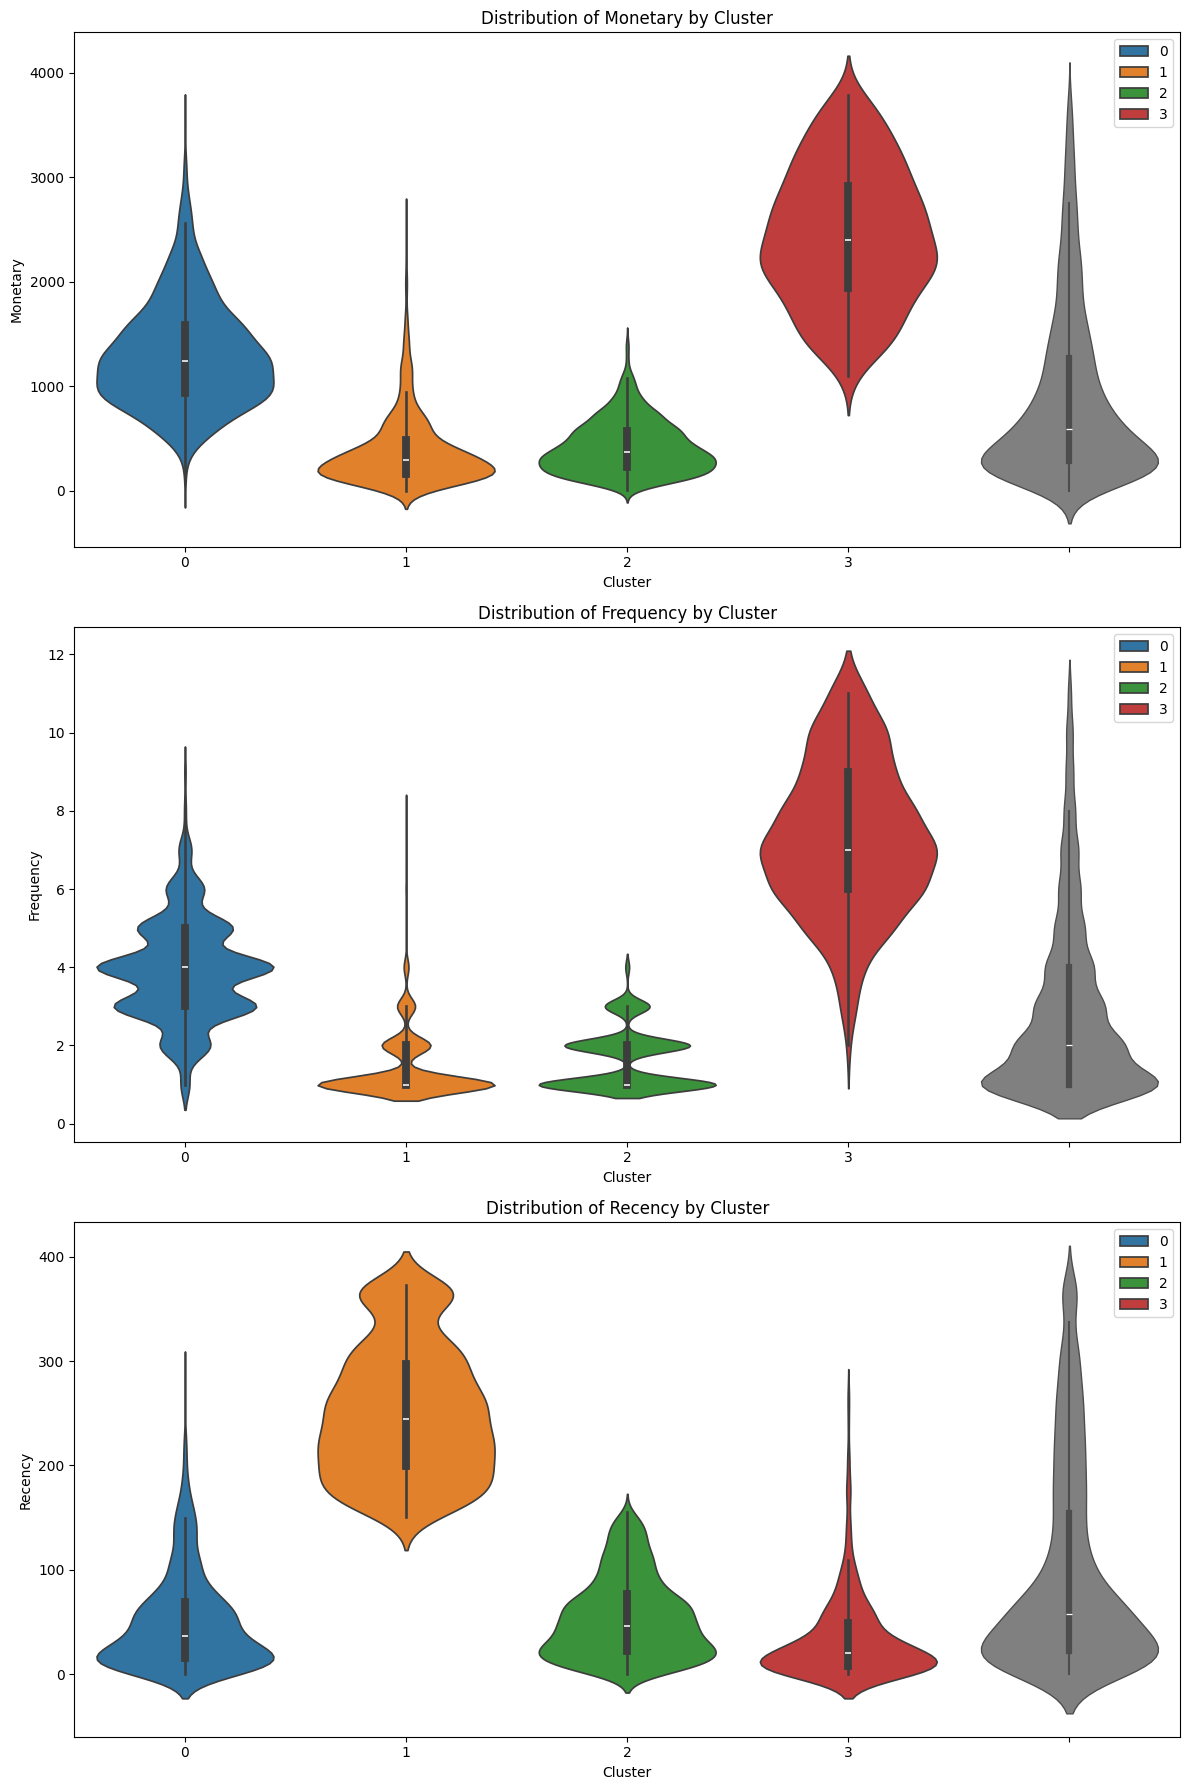

In [36]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=cas_nominaux_df['Cluster'], y=cas_nominaux_df['Monetary'], palette=cluster_colors, hue=cas_nominaux_df["Cluster"])
sns.violinplot(y=cas_nominaux_df['Monetary'], color='gray', linewidth=1.0)
plt.title('Distribution of Monetary by Cluster')
plt.ylabel('Monetary')

plt.subplot(3, 1, 2)
sns.violinplot(x=cas_nominaux_df['Cluster'], y=cas_nominaux_df['Frequency'], palette=cluster_colors, hue=cas_nominaux_df["Cluster"])
sns.violinplot(y=cas_nominaux_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Distribution of Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=cas_nominaux_df['Cluster'], y=cas_nominaux_df['Recency'], palette=cluster_colors, hue=cas_nominaux_df["Cluster"])
sns.violinplot(y=cas_nominaux_df['Recency'], color='gray', linewidth=1.0)
plt.title('Distribution of Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


## 6.5 Marketing Recommendations
### **Blue Cluster: "Retain"**  
**Justification:** This cluster groups high-value customers who purchase regularly, even if their purchases are not always very recent. The main objective is to implement retention actions to maintain their loyalty and spending level.  
**Action:** Implement loyalty programs, personalized offers and regular engagement to ensure they remain active.

---

### **Orange Cluster: "Re-engage"**  
**Justification:** This group includes low-value customers, making few purchases and who have not purchased recently. The objective is to re-engage them to restore active purchasing behavior.  
**Action:** Use targeted marketing campaigns, special promotions or reminders to encourage them to return and make new purchases.

---

### **Green Cluster: "Develop"**  
**Justification:** This cluster groups the least active and lowest value customers, but who have made recent purchases. They may be new customers or customers requiring support to increase their engagement and spending.  
**Action:** Focus on relationship building, offer excellent customer service and provide incentives to encourage more frequent purchases.

---

### **Red Cluster: "Reward"**  
**Justification:** This cluster groups high-value customers, making very frequent purchases and often still active. These are your most loyal customers, and it is essential to reward their commitment to maintain it.  
**Action:** Implement a strong loyalty program, offer exclusive benefits and recognize their loyalty to keep them engaged and satisfied.


# 7. Outliers Analysis


In [37]:
# Identify customers who are in both "Monetary-outliers" and "Frequency_outliers" groups
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

# Create 3 specific groups
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

# Create 3 clusters according to the 3 possible cases
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

# Group the outlier data into a dataset
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df


,Customer ID,Monetary,Frequency,Recency,Cluster
9,12357.00,11229.99,1,23,-1
25,12380.00,4782.84,4,100,-1
42,12409.00,12346.62,4,55,-1
48,12415.00,19468.84,4,10,-1
61,12431.00,4145.52,11,8,-1
...,...,...,...,...,...
4235,18223.00,7516.31,12,22,-3
4236,18225.00,7545.14,15,0,-3
4237,18226.00,6650.83,15,13,-3
4241,18231.00,4791.80,23,41,-3


We will use violin plots for the analysis


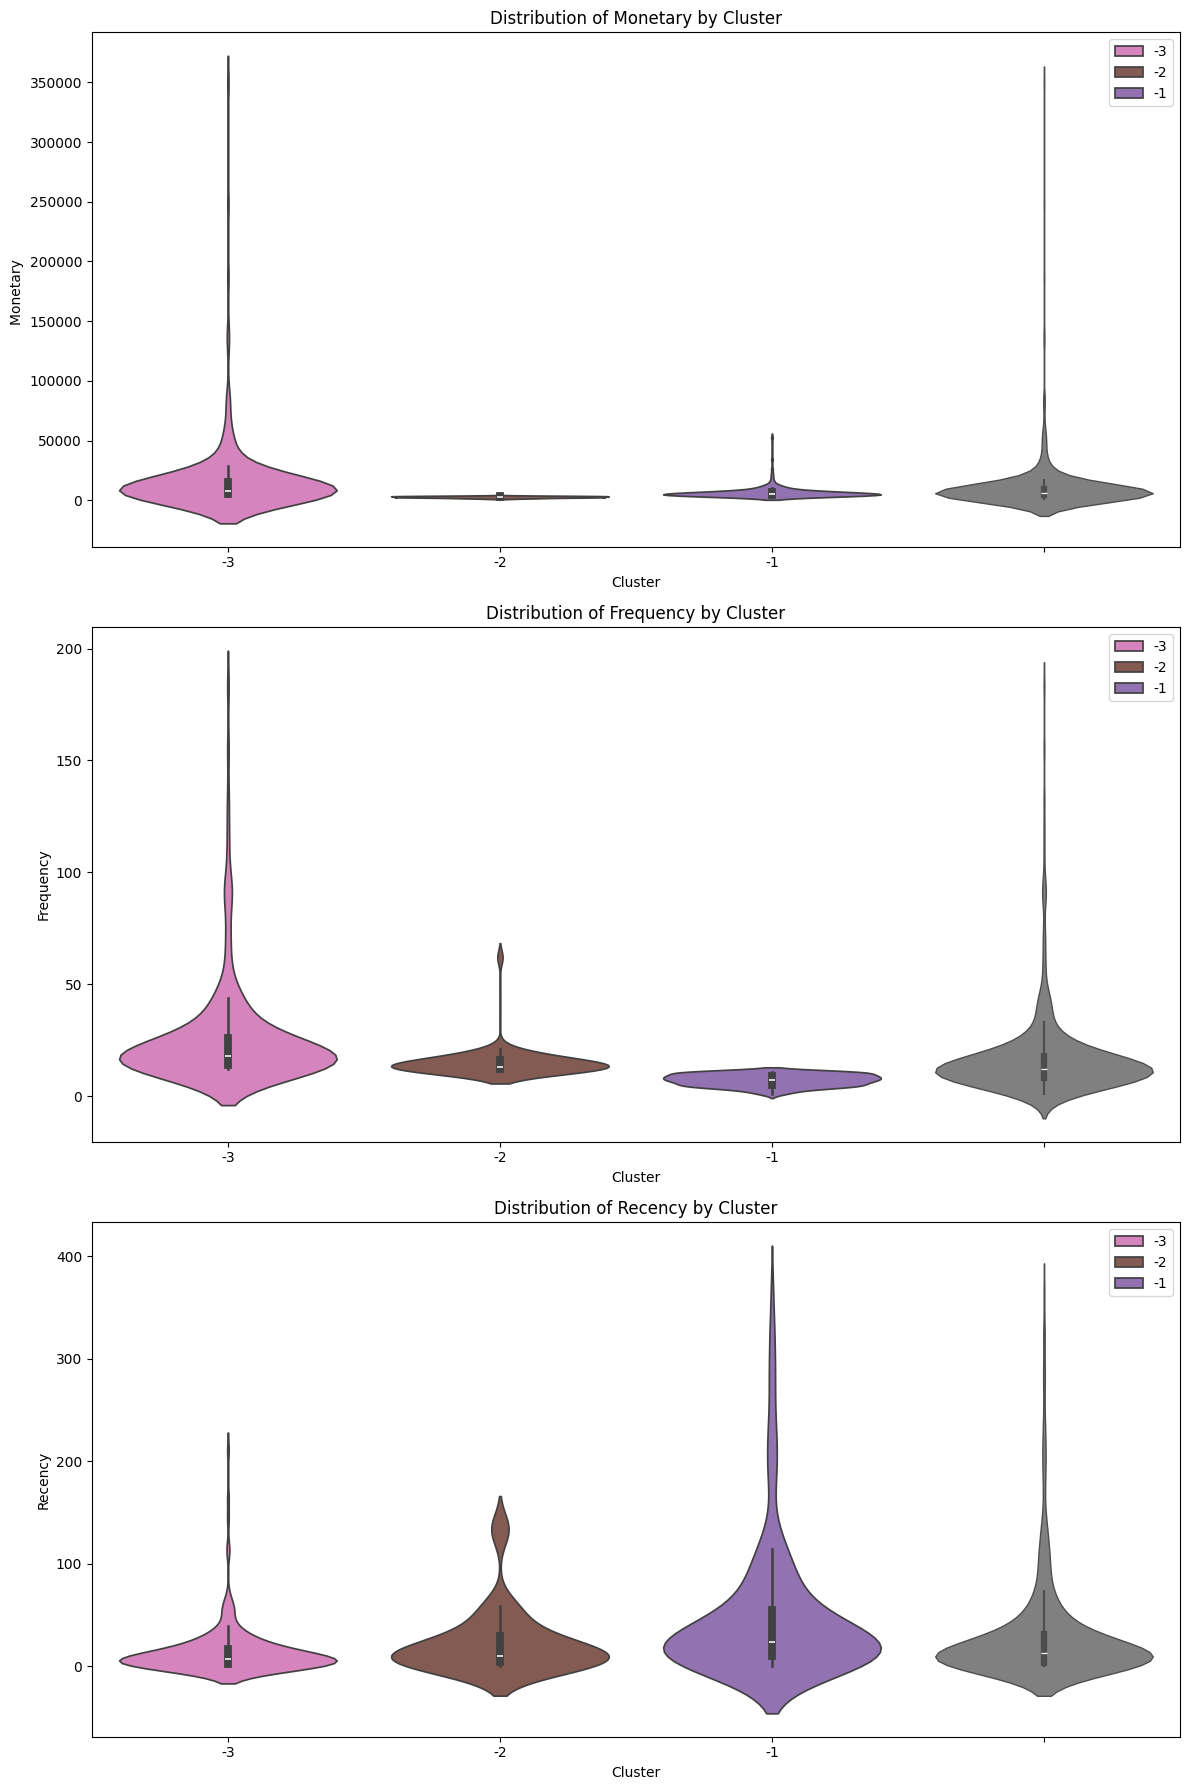

In [38]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Monetary'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Monetary'], color='gray', linewidth=1.0)
plt.title('Distribution of Monetary by Cluster')
plt.ylabel('Monetary ')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Distribution of Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Distribution of Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


# 7.1 Marketing Recommendations

### **Cluster -1 (Outliers on Monetary criterion): "Pamper"**  
**Characteristics:** Customers spending a lot, but not necessarily frequently. Their purchases are important in amount, but rare.  
**Potential strategy:** Focus on maintaining their loyalty through personalized offers or premium services adapted to their high spending capacity.

---

### **Cluster -2 (Outliers on Frequency criterion): "Increase basket"**  
**Characteristics:** Customers purchasing very frequently, but spending little with each purchase. They are regularly engaged, but could benefit from upsell opportunities.  
**Potential strategy:** Implement loyalty programs or bundled offers to encourage higher spending per visit, given their high purchase frequency.

---

### **Cluster -3 (Outliers on Monetary & Frequency): "Delight"**  
**Characteristics:** The most valuable customers among outliers, combining very high spending and very frequent purchases. These are probably your most prestigious customers, requiring special attention.  
**Potential strategy:** Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.


# 8. Final Segmentation
We will now group all the data into a single dataset with the associated clusters


In [39]:
segmentation_df = pd.concat([cas_nominaux_df, outlier_clusters_df])

segmentation_df


,Customer ID,Monetary,Frequency,Recency,Cluster
0,12346.00,169.36,2,164,1
1,12347.00,1323.32,2,2,0
2,12348.00,221.16,1,73,2
3,12349.00,2221.14,2,42,0
4,12351.00,300.93,1,10,2
...,...,...,...,...,...
4235,18223.00,7516.31,12,22,-3
4236,18225.00,7545.14,15,0,-3
4237,18226.00,6650.83,15,13,-3
4241,18231.00,4791.80,23,41,-3


We can also add labels for each cluster for better readability.


In [40]:
# Creating labels
cluster_labels = {
    0: "Retain",
    1: "Re-engage",
    2: "Develop",
    3: "Reward",
    -1: "Pamper",
    -2: "Increase basket",
    -3: "Delight"
}
segmentation_df["ClusterLabel"] = segmentation_df["Cluster"].map(cluster_labels)

segmentation_df


,Customer ID,Monetary,Frequency,Recency,Cluster,ClusterLabel
0,12346.00,169.36,2,164,1,Re-engage
1,12347.00,1323.32,2,2,0,Retain
2,12348.00,221.16,1,73,2,Develop
3,12349.00,2221.14,2,42,0,Retain
4,12351.00,300.93,1,10,2,Develop
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,22,-3,Delight
4236,18225.00,7545.14,15,0,-3,Delight
4237,18226.00,6650.83,15,13,-3,Delight
4241,18231.00,4791.80,23,41,-3,Delight
